## Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly
import seaborn as sns
import os
import shap
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno

In [9]:
cwd = os.getcwd()
print(cwd)
os.chdir(r'C:\Users\v-kumardeep\Desktop\Data Science\Hackerrank\dataset')
cwd = os.getcwd()
print(cwd)

C:\Users\v-kumardeep\Desktop\Data Science\Hackerrank\dataset
C:\Users\v-kumardeep\Desktop\Data Science\Hackerrank\dataset


In [10]:
data = pd.read_csv('train.csv')
data.head(5)

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
1,CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
3,CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI


##Check Missing Values

<AxesSubplot:>

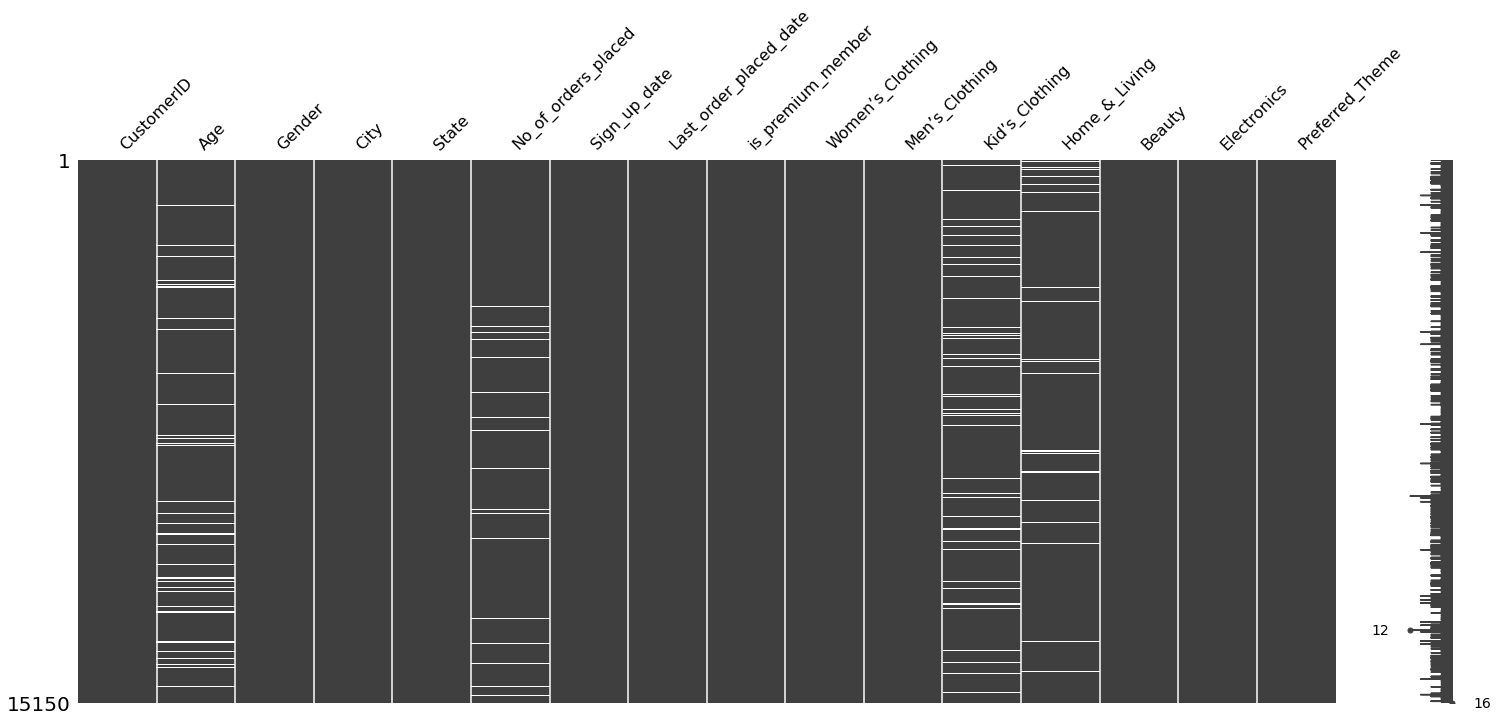

In [11]:
msno.matrix(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              15150 non-null  object 
 1   Age                     14147 non-null  float64
 2   Gender                  15150 non-null  object 
 3   City                    15150 non-null  object 
 4   State                   15150 non-null  object 
 5   No_of_orders_placed     14377 non-null  float64
 6   Sign_up_date            15150 non-null  object 
 7   Last_order_placed_date  15150 non-null  object 
 8   is_premium_member       15150 non-null  int64  
 9   Women’s_Clothing        15150 non-null  float64
 10  Men’s_Clothing          15150 non-null  float64
 11  Kid’s_Clothing          14215 non-null  float64
 12  Home_&_Living           14302 non-null  float64
 13  Beauty                  15150 non-null  float64
 14  Electronics             15150 non-null

In [13]:
data.describe()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
count,14147.000000,14377.000000,15150.000000,15150.000000,15150.000000,14215.000000,14302.000000,15150.000000,15150.000000
mean,28.356613,8.200876,0.323828,1.848024,4.464372,4.573373,4.576805,4.069482,2.830962
std,7.563249,3.606418,0.467951,12.814344,2.979838,2.628990,2.380538,3.808290,13.056017
min,15.000000,0.000000,0.000000,-99.000000,-1.000000,-3.000000,-2.000000,-20.114294,-99.000000
25%,22.000000,5.000000,0.000000,1.301135,2.019508,2.602179,2.817589,1.135181,2.472861
50%,29.000000,8.000000,0.000000,3.305220,3.603376,4.826021,4.338659,2.914518,4.602270
75%,33.000000,10.000000,1.000000,6.656113,7.595931,6.482865,6.532475,7.634503,7.872561
max,50.000000,15.000000,1.000000,9.998061,9.999751,9.997132,9.993163,26.564845,9.999038


##Independent and Dependent Variables

In [14]:
train_y = data.Preferred_Theme
train_x = data.drop(['Preferred_Theme'], axis=1)

### Feature Engineering

In [15]:
train_x.isnull().sum()

CustomerID                   0
Age                       1003
Gender                       0
City                         0
State                        0
No_of_orders_placed        773
Sign_up_date                 0
Last_order_placed_date       0
is_premium_member            0
Women’s_Clothing             0
Men’s_Clothing               0
Kid’s_Clothing             935
Home_&_Living              848
Beauty                       0
Electronics                  0
dtype: int64

In [16]:
train_x['Gender'].value_counts()

Male             6608
Female           6328
Not_Specified    2214
Name: Gender, dtype: int64

In [17]:
for i in range(len(train_x)):
    if train_x['Gender'][i] == 'Not_Specified':
        if train_x['Men’s_Clothing'][i] > train_x['Women’s_Clothing'][i]:
            train_x['Gender'][i] = 'Male'
        else:
            train_x['Gender'][i] = 'Female'

In [18]:
train_x['Gender'].value_counts()

Male      7682
Female    7468
Name: Gender, dtype: int64

In [19]:
train_x['Gender'] = train_x['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [20]:
train_x['Gender'].value_counts()

1    7682
0    7468
Name: Gender, dtype: int64

In [21]:
cols = ['Gender', 'Men’s_Clothing','Women’s_Clothing','Beauty','Electronics','Age']
X = train_x[cols]
X

,Gender,Men’s_Clothing,Women’s_Clothing,Beauty,Electronics,Age
0,1,8.924431,2.945701,1.924891,9.820254,22.0
1,0,2.363926,6.115229,8.561461,2.162229,NaN
2,1,3.000000,1.000000,0.808147,9.055563,26.0
3,1,9.064060,2.116475,0.459090,7.343461,NaN
4,0,1.995744,7.352878,8.184695,2.000000,29.0
...,...,...,...,...,...,...
15145,1,3.328216,1.074235,2.081818,4.225626,28.0
15146,1,6.349027,0.604496,1.214793,8.482181,25.0
15147,0,2.869684,3.812781,7.477459,2.861971,32.0
15148,0,1.370857,4.607484,7.748538,5.009866,32.0


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
X = pd.DataFrame(impute_it.fit_transform(X))
X.head(6)

,0,1,2,3,4,5
0,1.0,8.924431,2.945701,1.924891,9.820254,22.000000
1,0.0,2.363926,6.115229,8.561461,2.162229,28.242548
2,1.0,3.000000,1.000000,0.808147,9.055563,26.000000
3,1.0,9.064060,2.116475,0.459090,7.343461,28.717809
4,0.0,1.995744,7.352878,8.184695,2.000000,29.000000
5,1.0,3.639450,3.413308,5.043577,3.412935,28.000000


In [23]:
train_x.insert(1,"modified_Age", X[5], True)
train_x['modified_Age'] = train_x['modified_Age'].round()
train_x.head()

,CustomerID,modified_Age,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
0,CusID_00126,22.0,22.0,1,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254
1,CusID_00927,28.0,NaN,0,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229
2,CusID_01646,26.0,26.0,1,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563
3,CusID_06228,29.0,NaN,1,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461
4,CusID_04239,29.0,29.0,0,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000


<AxesSubplot:>

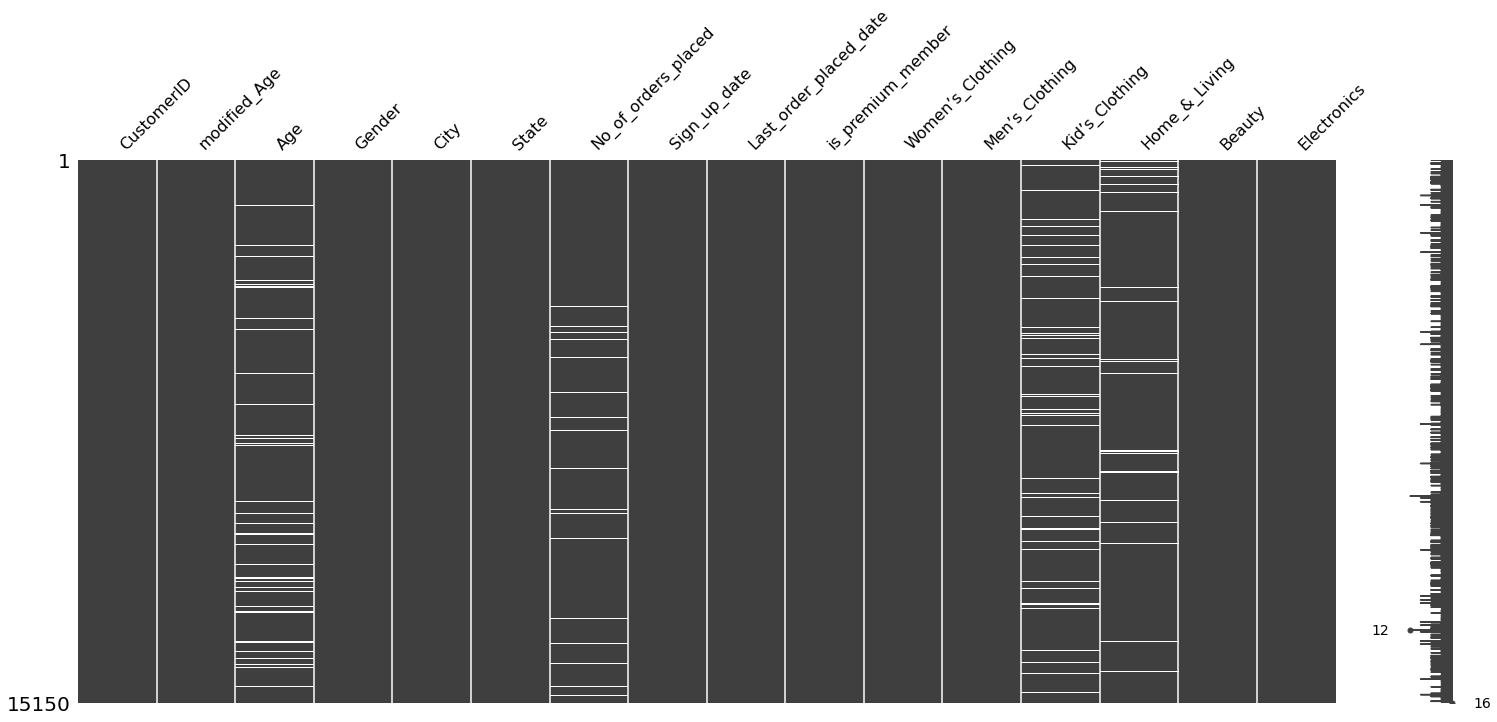

In [24]:
msno.matrix(train_x)

In [25]:
cols = ['modified_Age', 'Gender','Kid’s_Clothing']
X = train_x[cols]
X

,modified_Age,Gender,Kid’s_Clothing
0,22.0,1,2.000000
1,28.0,0,6.968752
2,26.0,1,1.766530
3,29.0,1,5.387599
4,29.0,0,2.676853
...,...,...,...
15145,28.0,1,9.075440
15146,25.0,1,0.413908
15147,32.0,0,6.213548
15148,32.0,0,6.108666


In [26]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X = pd.DataFrame(impute_knn.fit_transform(X))
X.head(5)

,0,1,2
0,22.0,1.0,2.000000
1,28.0,0.0,6.968752
2,26.0,1.0,1.766530
3,29.0,1.0,5.387599
4,29.0,0.0,2.676853


In [27]:
train_x.insert(12,"modified_kids_clothing", X[2], True)
train_x.head(5)

,CustomerID,modified_Age,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
0,CusID_00126,22.0,22.0,1,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.000000,2.325376,1.924891,9.820254
1,CusID_00927,28.0,NaN,0,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,6.968752,7.355854,8.561461,2.162229
2,CusID_01646,26.0,26.0,1,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,1.766530,3.471802,0.808147,9.055563
3,CusID_06228,29.0,NaN,1,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,5.387599,NaN,0.459090,7.343461
4,CusID_04239,29.0,29.0,0,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,2.676853,7.159554,8.184695,2.000000


In [28]:
cols = ['modified_Age', 'Gender','Home_&_Living']
X = train_x[cols]
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X = pd.DataFrame(impute_knn.fit_transform(X))
train_x.insert(14,"modified_home_living", X[2], True)
train_x.head(5)

,CustomerID,modified_Age,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,Kid’s_Clothing,modified_home_living,Home_&_Living,Beauty,Electronics
0,CusID_00126,22.0,22.0,1,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.000000,2.325376,2.325376,1.924891,9.820254
1,CusID_00927,28.0,NaN,0,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,6.968752,7.355854,7.355854,8.561461,2.162229
2,CusID_01646,26.0,26.0,1,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,1.766530,3.471802,3.471802,0.808147,9.055563
3,CusID_06228,29.0,NaN,1,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,5.387599,3.619858,NaN,0.459090,7.343461
4,CusID_04239,29.0,29.0,0,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,2.676853,7.159554,7.159554,8.184695,2.000000


In [29]:
cols = ['modified_Age', 'Gender','No_of_orders_placed']
X = train_x[cols]
impute_it = IterativeImputer()
X = pd.DataFrame(impute_it.fit_transform(X))
train_x.insert(6,"modified_No_of_orders_placed", X[2], True)
train_x['modified_No_of_orders_placed'] = train_x['modified_No_of_orders_placed'].round()
train_x.head(5)

,CustomerID,modified_Age,Age,Gender,City,State,modified_No_of_orders_placed,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,Kid’s_Clothing,modified_home_living,Home_&_Living,Beauty,Electronics
0,CusID_00126,22.0,22.0,1,Vancouver,British Columbia,4.0,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.000000,2.325376,2.325376,1.924891,9.820254
1,CusID_00927,28.0,NaN,0,Budapest,Central Hungary,9.0,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,6.968752,7.355854,7.355854,8.561461,2.162229
2,CusID_01646,26.0,26.0,1,Mumbai,Maharashtra,8.0,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,1.766530,3.471802,3.471802,0.808147,9.055563
3,CusID_06228,29.0,NaN,1,San Francisco,California,7.0,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,5.387599,3.619858,NaN,0.459090,7.343461
4,CusID_04239,29.0,29.0,0,Taipei,Taiwan,8.0,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,2.676853,7.159554,7.159554,8.184695,2.000000


In [30]:
train_x = train_x.drop(['CustomerID','Age','No_of_orders_placed','Kid’s_Clothing','Home_&_Living','Sign_up_date','Last_order_placed_date'], axis=1)
train_x.head(5)

,modified_Age,Gender,City,State,modified_No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,modified_home_living,Beauty,Electronics
0,22.0,1,Vancouver,British Columbia,4.0,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254
1,28.0,0,Budapest,Central Hungary,9.0,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229
2,26.0,1,Mumbai,Maharashtra,8.0,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563
3,29.0,1,San Francisco,California,7.0,0,2.116475,9.064060,5.387599,3.619858,0.459090,7.343461
4,29.0,0,Taipei,Taiwan,8.0,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000


In [31]:
train_x = pd.get_dummies(train_x, columns=['City','State'], drop_first=True)
train_x.head(6)

,modified_Age,Gender,modified_No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,modified_home_living,Beauty,Electronics,...,State_New York,State_Ontario,State_Singapore,State_Taiwan,State_Tamil Nadu,State_Tokyo,State_Tuscany,State_Vienna,State_West Bengal,State_Western Australia
0,22.0,1,4.0,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,...,0,0,0,0,0,0,0,0,0,0
1,28.0,0,9.0,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,...,0,0,0,0,0,0,0,0,0,0
2,26.0,1,8.0,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,...,0,0,0,0,0,0,0,0,0,0
3,29.0,1,7.0,0,2.116475,9.064060,5.387599,3.619858,0.459090,7.343461,...,0,0,0,0,0,0,0,0,0,0
4,29.0,0,8.0,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,...,0,0,0,1,0,0,0,0,0,0
5,28.0,1,15.0,1,3.413308,3.639450,7.809194,1.315751,5.043577,3.412935,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x), columns = train_x.columns)

In [33]:
train_x.head(4)

,modified_Age,Gender,modified_No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,modified_home_living,Beauty,Electronics,...,State_New York,State_Ontario,State_Singapore,State_Taiwan,State_Tamil Nadu,State_Tokyo,State_Tuscany,State_Vienna,State_West Bengal,State_Western Australia
0,-0.868731,0.985973,-1.192768,-0.692036,0.085663,1.496795,-1.011976,-0.952605,-0.563156,0.535349,...,-0.186265,-0.182437,-0.207954,-0.179324,-0.212235,-0.201655,-0.198803,-0.201301,-0.237356,-0.240444
1,-0.047853,-1.014227,0.230370,-0.692036,0.333013,-0.704909,0.897788,1.165009,1.179566,-0.051222,...,-0.186265,-0.182437,-0.207954,-0.179324,-0.212235,-0.201655,-0.198803,-0.201301,-0.237356,-0.240444
2,-0.321479,0.985973,-0.054258,-0.692036,-0.066180,-0.491443,-1.101711,-0.470009,-0.856406,0.476777,...,-0.186265,-0.182437,-0.207954,-0.179324,-0.212235,-0.201655,-0.198803,-0.201301,-0.237356,-0.240444
3,0.088960,0.985973,-0.338885,-0.692036,0.020950,1.543655,0.290064,-0.407684,-0.948066,0.345637,...,-0.186265,-0.182437,-0.207954,-0.179324,-0.212235,-0.201655,-0.198803,-0.201301,-0.237356,-0.240444


In [34]:
train_y.value_counts()

New_UI    7674
Old_UI    7476
Name: Preferred_Theme, dtype: int64

In [35]:
train_y = train_y.apply(lambda x: 1 if x == 'New_UI' else 0)
train_y.head(4)

0    1
1    0
2    1
3    1
Name: Preferred_Theme, dtype: int64

In [36]:
train_y.value_counts()

1    7674
0    7476
Name: Preferred_Theme, dtype: int64

### Split dataset

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.1, random_state = 123)

### Model

In [38]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
def classifier(model,param):
    cv=RandomizedSearchCV(estimator=model, param_distributions=param, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=42, n_jobs=-1)
    cv.fit(X_train, y_train)

    best_model = cv.best_estimator_

    k_fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=21) 

    f1_cv = cross_val_score(best_model, X_test, y_test, cv=k_fold, scoring='f1', n_jobs=-1)
    f1 = pd.DataFrame(data={'Score': f1_cv, 'Metric': 'F1'})
    acc_cv = cross_val_score(best_model, X_test, y_test, cv=k_fold, scoring='accuracy', n_jobs=-1)
    acc = pd.DataFrame(data={'Score': acc_cv, 'Metric': 'Accuracy'})
    df = pd.concat([f1, acc], axis=0)

    print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(cv.best_score_, cv.best_estimator_))
    print()
    print("{:.2f}% Accuracy on the validation set with a standard deviation of {:.1f}"\
          .format(acc_cv.mean()*100, acc_cv.std()*100))
    print("{:.2f}% F1-score on the validation with set a standard deviation of {:.1f}"\
          .format(f1_cv.mean()*100, f1_cv.std()*100))
    print()

In [ ]:
xgb = XGBClassifier()
grid_xgb = {'max_depth': [3, 7, 14, 21],
        'min_split_loss': [0,2, 5, 10],
        'learning_rate' : [0.01,0.05,0.1,0.3,0.5,0.7]}


rf=RandomForestClassifier(class_weight='balanced', random_state=92)
grid_rf = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'criterion':['gini', 'entropy'],
        'max_depth': [3, 7, 14, 21],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':  [3, 5, 7],
        'max_features': [None, 'sqrt'],
        'max_leaf_nodes': [None, 5, 10, 15, 20],
        'min_impurity_decrease': [0.001, 0.01, 0.05, 0.1],
        'bootstrap': [True, False]}

svc = SVC(random_state = 92)
grid_svc = {'C':[int(x) for x in np.linspace(start = 1, stop = 1000, num = 5)],
        'kernel':['linear', 'poly','rbf','sigmoid',''],
        'gamma': ['scale','auto','liblinear','sag'],
        'class_weight': ['dict', 'balanced']}

LR = LogisticRegression(random_state = 92)
grid_LR = {'C':[int(x) for x in np.linspace(start = 1, stop = 1000, num = 5)],
          'class_weight': ['dict', 'balanced'],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'verbose': [int(x) for x in np.linspace(start = 1, stop = 100, num = 5)]}

GB = GradientBoostingClassifier()
grid_GB = {'loss': ['deviance','exponential'],
          'learning_rate' : [0.01,0.05,0.1,0.3,0.5,0.7],
          'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
          'max_depth': [3, 7, 14, 21],
          'max_features': ['auto', 'sqrt', 'log2']}

neigh = KNeighborsClassifier()
grid_neigh = {'n_neighbors':[2,5,7,9,10],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'P':[1,2],
             'metric': ['str', 'callable','minkowski']}


models = [xgb ,rf,svc,LR,GB,neigh]
grid = [grid_xgb, grid_rf, grid_svc, grid_LR, grid_GB, grid_neigh]

for i in range(0,len(models)):
    classifier(models[i] , grid[i])

[17:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Grid Search CV Best AUC = 0.788
Best Params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, min_split_loss=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=Non

In [40]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, min_split_loss=5, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB.fit(X_train,y_train)


[18:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, min_split_loss=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 99%|===================| 13562/13635 [01:38<00:00]        

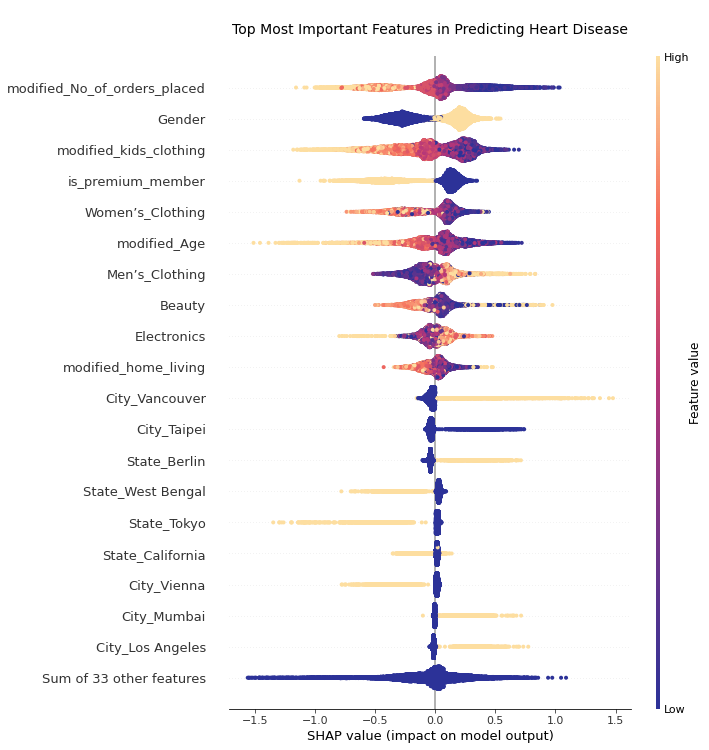

In [41]:
sunset=LinearSegmentedColormap.from_list('sunset', [(0, '#2C3298'), (0.5, '#B53679'),
                                                    (.75, '#F56C5B'), (1, '#FDDEA0')], N=256)
explainer = shap.Explainer(XGB, X_train)
shap_values = explainer(X_train)
plt.title(label="\nTop Most Important Features in Predicting Heart Disease\n", fontsize=14)
shap.plots.beeswarm(shap_values, order=shap_values.abs.mean(0), max_display=20, 
                    color=sunset, plot_size=[9,12])

In [36]:
ft_importance = pd.DataFrame({"Feature Importance":np.abs(shap_values.values).mean(0)}, index=X_train.columns)
X_cols=ft_importance.query('`Feature Importance` > 0.1').sort_values(by="Feature Importance", ascending=False)
X_cols.style.background_gradient(cmap=sunset, vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})

,Feature Importance
modified_No_of_orders_placed,0.254
Gender,0.241
modified_kids_clothing,0.240
is_premium_member,0.233
City_Toronto,0.203
Women’s_Clothing,0.170
modified_Age,0.170
Men’s_Clothing,0.122
Beauty,0.101


In [ ]:
X_train=X_train[X_cols.index]
X_test=X_test[X_cols.index]
print("New Dataset Shapes with Shapley Values above 0.1:")
print("Train Shape:",X_train.shape)
print("Test Shape:",X_test.shape)

In [41]:
def cleandata(train_x):
    for i in range(len(train_x)):
        if train_x['Gender'][i] == 'Not_Specified':
            if train_x['Men’s_Clothing'][i] > train_x['Women’s_Clothing'][i]:
                train_x['Gender'][i] = 'Male'
            else:
                train_x['Gender'][i] = 'Female'
    
    train_x['Gender'] = train_x['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    cols = ['Gender', 'Men’s_Clothing','Women’s_Clothing','Beauty','Electronics','Age']
    X = train_x[cols]    
    impute_it = IterativeImputer()
    X = pd.DataFrame(impute_it.fit_transform(X))
    train_x.insert(1,"modified_Age", X[5], True)
    train_x['modified_Age'] = train_x['modified_Age'].round()

    cols = ['modified_Age', 'Gender','Kid’s_Clothing']
    X = train_x[cols]
    from sklearn.impute import KNNImputer
    impute_knn = KNNImputer(n_neighbors=2)
    X = pd.DataFrame(impute_knn.fit_transform(X))
    train_x.insert(12,"modified_kids_clothing", X[2], True)
    cols = ['modified_Age', 'Gender','Home_&_Living']
    X = train_x[cols]
    impute_knn = KNNImputer(n_neighbors=2)
    X = pd.DataFrame(impute_knn.fit_transform(X))
    train_x.insert(14,"modified_home_living", X[2], True)

    cols = ['modified_Age', 'Gender','No_of_orders_placed']
    X = train_x[cols]
    impute_it = IterativeImputer()
    X = pd.DataFrame(impute_it.fit_transform(X))
    train_x.insert(6,"modified_No_of_orders_placed", X[2], True)
    train_x['modified_No_of_orders_placed'] = train_x['modified_No_of_orders_placed'].round()

    train_x = train_x.drop(['CustomerID','Age','No_of_orders_placed','Kid’s_Clothing','Home_&_Living','Sign_up_date','Last_order_placed_date'], axis=1)
    train_x = pd.get_dummies(train_x, columns=['City','State'], drop_first=True)
    scaler = StandardScaler()
    train_x = pd.DataFrame(scaler.fit_transform(train_x), columns = train_x.columns)
    return train_x

In [42]:
test = pd.read_csv('test.csv')

In [43]:
data = cleandata(test)
data.head(5)

,modified_Age,Gender,modified_No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,modified_kids_clothing,modified_home_living,Beauty,Electronics,...,State_New York,State_Ontario,State_Singapore,State_Taiwan,State_Tamil Nadu,State_Tokyo,State_Tuscany,State_Vienna,State_West Bengal,State_Western Australia
0,-1.142624,-1.008686,-0.901806,-0.718605,-0.133197,-0.431634,0.501080,1.537064,1.747345,-1.267238,...,-0.211205,-0.209805,-0.22348,-0.239046,-0.213983,-0.189299,-0.209805,-0.22481,-0.216731,-0.21536
1,-0.526591,0.991388,0.771835,1.391585,-0.001832,0.510239,0.769930,0.008712,0.284579,-0.092629,...,-0.211205,-0.209805,-0.22348,-0.239046,-0.213983,-0.189299,-0.209805,-0.22481,-0.216731,-0.21536
2,0.212648,-1.008686,-2.017567,1.391585,1.234336,-0.106957,1.941762,1.985665,1.436171,-0.967030,...,-0.211205,-0.209805,-0.22348,-0.239046,-0.213983,-0.189299,-0.209805,-0.22481,-0.216731,4.64338
3,-1.512244,-1.008686,-0.343926,-0.718605,1.390404,-0.230419,-0.300037,1.480558,1.593511,-0.611023,...,-0.211205,-0.209805,-0.22348,-0.239046,-0.213983,-0.189299,-0.209805,-0.22481,4.614017,-0.21536
4,1.198300,0.991388,-0.064986,-0.718605,-0.672613,1.637984,0.530625,-0.485728,-0.697236,0.833526,...,4.734736,-0.209805,-0.22348,-0.239046,-0.213983,-0.189299,-0.209805,-0.22481,-0.216731,-0.21536


In [44]:
RF = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, max_features=None,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       min_samples_split=5, random_state=92)


In [45]:
RF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, max_features=None,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       min_samples_split=5, random_state=92)

In [46]:
pred = RF.predict(data)

In [47]:
pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [49]:
pred = pd.DataFrame(pred)

In [50]:
pred.to_csv('file1.csv')

In [5]:
data = pd.read_csv('submission.csv')

In [6]:
data['Preferred_Theme'] = data['Preferred_Theme'].apply(lambda x: 'New_UI' if x == 1 else 'Old_UI')

In [7]:
data.to_csv('submit.csv')